In [1]:
import matplotlib.pyplot as plt
from cvxopt import matrix, spdiag
import chompack as cp
import numpy as np
import random

from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
backend = Aer.get_backend('aer_simulator')

In [2]:
adhoc_dimension = 2
N_dataset, train_labels, n_dataset, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [3]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    backend, shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(
    feature_map=adhoc_feature_map, quantum_instance=adhoc_backend, enforce_psd=True
)

In [4]:
N_compute = adhoc_kernel.evaluate(x_vec=N_dataset)
N_prime = adhoc_kernel.evaluate(x_vec=N_dataset, y_vec=n_dataset)

In [42]:
#print(N_prime)

In [6]:
def is_semi_pos_def_eigsh(x, epsilon=1e-10):
    return np.all(np.linalg.eigvalsh(x) >= -epsilon)

matrix_tocheck = N_compute
print(is_semi_pos_def_eigsh(matrix(matrix_tocheck)))

True


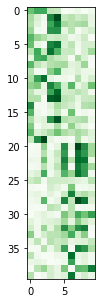

In [14]:
plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(N_prime), interpolation="nearest", origin="upper", cmap="Greens")
plt.show()

## Add u

In [32]:
print("N : \n", N_dataset)
print("---")

print("n : \n", n_dataset)

N : 
 [[1.31946891 5.40353936]
 [4.1469023  0.81681409]
 [2.38761042 5.52920307]
 [2.89026524 3.51858377]
 [4.1469023  5.27787566]
 [4.39822972 1.94778745]
 [3.14159265 0.9424778 ]
 [0.25132741 5.02654825]
 [4.08407045 2.0106193 ]
 [1.25663706 1.25663706]
 [5.40353936 0.        ]
 [4.96371639 0.56548668]
 [2.63893783 5.46637122]
 [1.00530965 3.76991118]
 [0.37699112 2.89026524]
 [4.90088454 4.83805269]
 [3.95840674 3.64424748]
 [1.50796447 5.15221195]
 [0.31415927 0.62831853]
 [0.50265482 1.63362818]
 [1.38230077 3.01592895]
 [1.13097336 3.01592895]
 [1.94778745 3.0787608 ]
 [1.13097336 3.01592895]
 [0.31415927 4.83805269]
 [0.87964594 4.71238898]
 [3.39292007 0.        ]
 [6.09468975 3.95840674]
 [0.18849556 4.71238898]
 [1.69646003 4.71238898]
 [1.19380521 6.03185789]
 [6.1575216  5.59203492]
 [5.2150438  0.12566371]
 [0.50265482 3.20442451]
 [5.59203492 6.1575216 ]
 [1.13097336 3.01592895]
 [4.96371639 5.0893801 ]
 [0.         0.43982297]
 [6.1575216  1.82212374]
 [1.94778745 4.9008

In [48]:
nu_dataset = n_dataset

for i in range(35):
    nu_dataset = np.append(test_set, [N_dataset[i]], axis = 0)

In [51]:
Nnu_prime = adhoc_kernel.evaluate(x_vec=N_dataset, y_vec=nu_dataset)

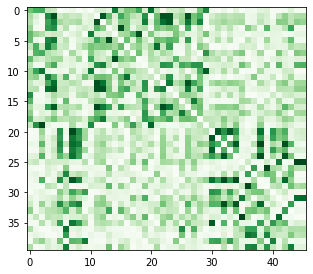

In [52]:
plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(N_prime), interpolation="nearest", origin="upper", cmap="Greens")
plt.show()